<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
linear representation
</font>
</h1>

In [134]:
import numpy as np


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [135]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

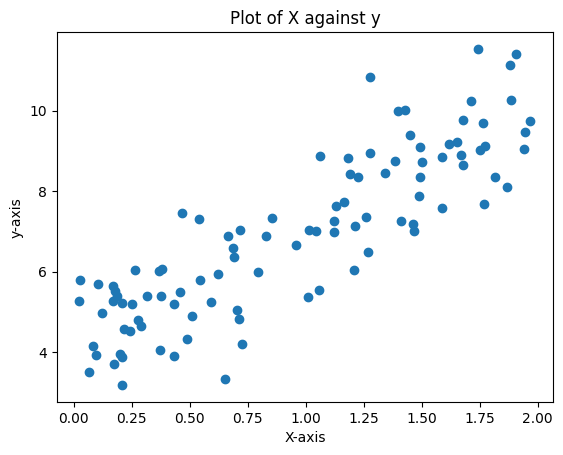

In [136]:
import matplotlib.pyplot as plt


plt.scatter(X, y)
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title('Plot of X against y')

plt.show()

In [137]:
theta_best

array([[4.12462557],
       [2.95573812]])

These amounts are close enough, and considering the noise we added, it is nearly impossible to calculate the exact amounts.

In [138]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [139]:
y_predict = X_new_b.dot(theta_best)

In [140]:
y_predict

array([[ 4.12462557],
       [10.03610181]])

Let's plot this :

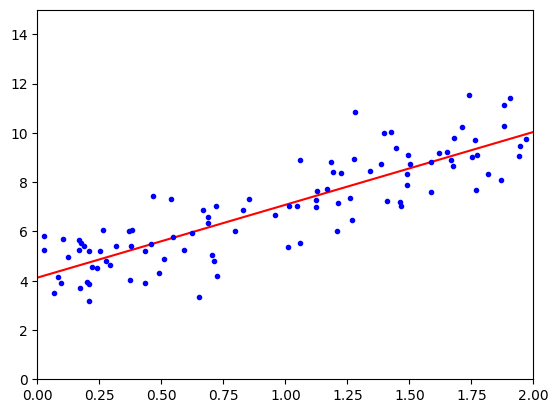

In [141]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [142]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [143]:
lin_reg.coef_

array([[2.95573812]])

In [144]:
lin_reg.intercept_

array([4.12462557])

In [145]:
lin_reg.predict(X_new)

array([[ 4.12462557],
       [10.03610181]])

The LinearRegression class is based on the scipy.linalq.lstsg() function which itself is based on RMSE, which we can call directly.

In [146]:
theta_best_svd, resudiuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [147]:
theta_best_svd

array([[4.12462557],
       [2.95573812]])

<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Syntax
</font>
</h1>


A little bit of explanation on the syntax seing as there are no error's 

In [148]:
temp = [2, 3, 4, 5, 6]
temp_c = [7, 8, 9]


temp_1 = np.r_[temp, temp_c]

In [149]:
temp_1

array([2, 3, 4, 5, 6, 7, 8, 9])

In [150]:
temp = [[2], [3], [4]]
temp_c = [[7], [8], [9]]


temp_1 = np.c_[temp, temp_c]

In [151]:
temp_1

array([[2, 7],
       [3, 8],
       [4, 9]])

<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Moore-Penrose Pseudoinverse
</font>
</h1>

The formula of pseudoinverse of a given matrix A is :


$$ A^+ = V \cdot D^+ \cdot U^\top $$

In [152]:
A = np.array([[-1, 2], 
              [3, -2], 
              [5, 7]])

U : left singular vectors of A

VT : right singular vectors of A

d = singluar values for A

In [153]:
U, d, VT = np.linalg.svd(A)

Lets creat $$ D^+ $$

In [154]:
D = np.diag(d)

In [155]:
Dinv = np.linalg.inv(D)

D plus must have the same dimension as A transposed matrix

In [156]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)

In [157]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Or we can just :

In [158]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Gradient Decent
</font>
</h1>

In [159]:
eta = 0.1
n_iterations = 1000
m = 100


theta = np.random.randn(2, 1)


for i in range(n_iterations):
    gradient = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient

In [160]:
theta

array([[4.12462557],
       [2.95573812]])

We could use networks to determine the optimal learning rate (Grid Search)

The vanila gradient decent method, usses the entire training data set in each step to calculate the gradient vector, 

But this could be time consuming, and in some cases impossible.

So we can use the SGD (Stochastic Gradient Descent) algorithm to solve this issue.

The SGD (because of the randomness) has a more probability of jumping the local minimum's

In [161]:
n_epochs = 50
t0, t1 = 5, 50


def learning_schedule(t):
    return t0 / (t + t1)

In [162]:
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient

In [163]:
theta

array([[4.08349937],
       [2.94667521]])

Good enough.

In [164]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [165]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19501156]), array([3.0477733]))

| Algorithm   | Big Data Set | High Number of Features | Hyperparameters | Need of Scaling | Class            |
|:-----------:|:------------:|:-----------------------:|:---------------:|:---------------:|:----------------:|
| Normal eq   | Fast         | Slow                    | 0               | No              | Non              |
| SVD         | Fast         | Slow                    | 0               | No              | LinearRegressor  |
| BGD         | Slow         | Fast                    | 2               | Yes             | SGDRegressor     |
| SGD         | Fast         | Fast                    | \>=2            | Yes             | SGDRegressor     |
| MGD         | Fast         | Fast                    | \>=2            | Yes             | SGDRegressor     |


<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Polynomial Regression
</font>
</h1>

In [166]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [167]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [168]:
X[0]

array([-2.90692521])

In [169]:
X_poly[0]

array([-2.90692521,  8.45021416])

We are basically making the degree into an extra feature, and then making a linear regression model off of it.

In [170]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [171]:
lin_reg.coef_, lin_reg.intercept_

(array([[0.92579322, 0.53420681]]), array([1.862126]))

Good enough

<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Learning Curve
</font>
</h1>

In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2)
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3)

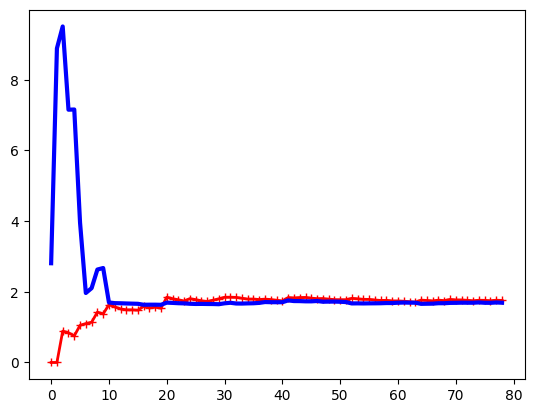

In [173]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

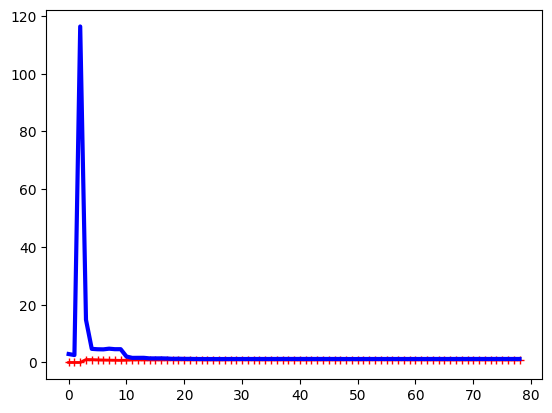

In [174]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X_poly, y)

Let's see if adding features helps

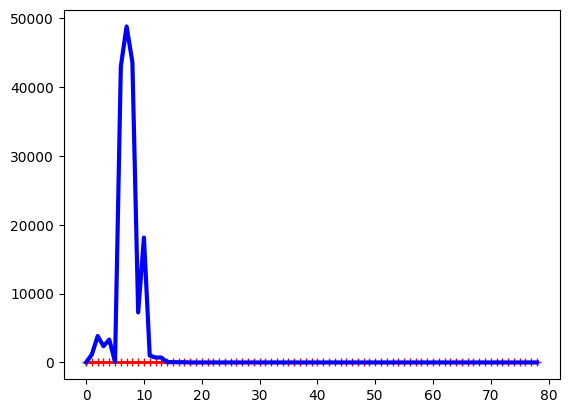

In [175]:
from sklearn.pipeline import Pipeline


polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])


plot_learning_curve(polynomial_regression, X, y)

<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Model Regularization
</font>
</h1>

## Ridge Regression Cost Function

The cost function for Ridge Regression, which is a type of L2 Regularization, is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2 $$

Where:

- $J(\theta)$ is the cost function.
- $m$ is the number of training examples.
- $h_\theta(x^{(i)})$ is the hypothesis function evaluated at the $i$-th example.
- $y^{(i)}$ is the actual value of the output for the $i$-th example.
- $\lambda$ is the regularization parameter.
- $\theta_j$ are the parameters of the model (excluding $\theta_0$).
- The first term is the usual mean squared error term.
- The second term is the L2 regularization term which penalizes the magnitude of the parameters.


Calculating the regression with closed form

In [176]:
from sklearn.linear_model import Ridge


ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [177]:
ridge_reg.predict([[1.5]])

array([[4.88365523]])

And with GD

In [178]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [179]:
sgd_reg.predict([[1.5]])

array([4.86955968])

The penalty parameter is kind of a regularization term, inwhich "l2" means to use the Elucid Normalization

## Lasso Regression Cost Function

The cost function for Lasso Regression, which is a type of L1 Regularization, is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} |\theta_j| $$

Where:

- $J(\theta)$ is the cost function.
- $m$ is the number of training examples.
- $h_\theta(x^{(i)})$ is the hypothesis function evaluated at the $i$-th example.
- $y^{(i)}$ is the actual value of the output for the $i$-th example.
- $\lambda$ is the regularization parameter.
- $\theta_j$ are the parameters of the model (excluding $\theta_0$).
- The first term is the usual mean squared error term.
- The second term is the L1 regularization term which penalizes the absolute value of the parameters.


LASSO = Least Absolute Shrinkage and Selection Operator

the model generated from this method of regression is a Sparced Model (Not all weights have non-zero values)

In [180]:
from sklearn.linear_model import Lasso


lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [181]:
lasso_reg.predict([[1.5]])

array([4.8398881])

## Elastic Net Regression Cost Function

The cost function for Elastic Net Regression, combining L1 and L2 Regularization, is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \left( \alpha \sum_{j=1}^{n} |\theta_j| + \frac{1 - \alpha}{2} \sum_{j=1}^{n} \theta_j^2 \right) $$

Where:

- $J(\theta)$ is the cost function.
- $m$ is the number of training examples.
- $h_\theta(x^{(i)})$ is the hypothesis function evaluated at the $i$-th example.
- $y^{(i)}$ is the actual value of the output for the $i$-th example.
- $\lambda$ is the overall regularization parameter.
- $\alpha$ is the mixing parameter that balances L1 and L2 regularization (with values between 0 and 1).
- $\theta_j$ are the parameters of the model (excluding $\theta_0$).
- The first term is the mean squared error term.
- The second and third terms represent the L1 and L2 regularization terms, respectively.


Something in between Lasso and Ridge regression

In [182]:
from sklearn.linear_model import ElasticNet


elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [183]:
elastic_net.predict([[1.5]])

array([4.84175372])

As a general quide line :

Make sure not to use simple regression

The default should be Ridge regression, but as this model keeps all the features, 
If you know that some features are BS, you can use either Elastic Net or Lasso

Again, here Elastic is better, cause when the number of features surpasses the training data or some features are dependent on each other, Lasso might not be a good choice.

## Early Stopping

Early Stopping is a form of regularization used to avoid overfitting when training a machine learning model, particularly in the context of training neural networks or other models with iterative learning algorithms like gradient descent.

### Concept

- **Objective:** Early Stopping aims to stop the training process at the point when performance on a validation set starts to degrade, indicating the onset of overfitting.
- **Implementation:** During training, the model's performance is constantly monitored on a separate validation dataset that is not used for training. After each epoch (or iteration), the model's performance (usually error or loss) on the validation set is evaluated.
- **Stopping Criterion:** If the model's performance on the validation set begins to worsen (i.e., the validation error starts to increase), instead of continuing to improve, the training process is halted. This point is considered the optimal trade-off between underfitting and overfitting.
- **Best Model Selection:** Typically, the model state at the point where the validation performance was the best (just before deterioration) is saved and used as the final model.

### Benefits

- **Prevents Overfitting:** By stopping the training once the model begins to overfit, early stopping ensures that the model retains its generalization ability.
- **Efficiency:** It can reduce computational cost by stopping training before the maximum number of epochs is reached.
- **Automatic Model Selection:** Early stopping acts as a form of automatic model selection, choosing the model that is expected to perform best on unseen data.

### Considerations

- **Validation Set:** A properly representative validation set is crucial for the effectiveness of early stopping.
- **Patience Parameter:** Often, a 'patience' parameter is used, allowing the training to continue for a certain number of epochs even after the initial sign of overfitting, to rule out random fluctuations in validation performance.
- **Trade-Off:** The key challenge is to balance stopping early enough to prevent overfitting but late enough so that the model is adequately trained.

Early Stopping is widely used in practice and is an essential tool in the machine learning practitioner's toolkit, especially for training complex models.


In [213]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler


poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
     ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


sgd_reg = SGDRegressor(max_iter=1, 
                       tol=None, 
                       warm_start=True, 
                       penalty=None, 
                       learning_rate="constant", 
                       eta0=0.0005
                       )

In [214]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Logistic Regression
</font>
</h1>

# Vanila

In [217]:
from sklearn import datasets


iris = datasets.load_iris()

In [218]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [220]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [221]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

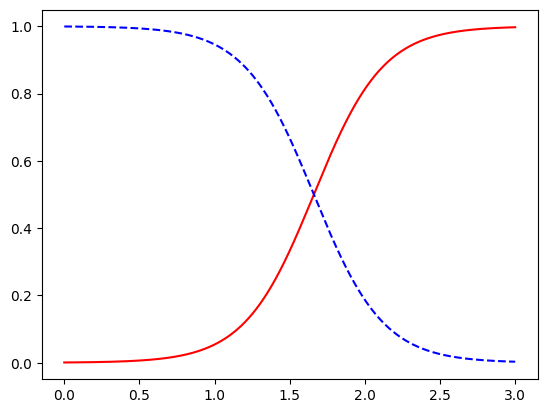

In [229]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "r-")
plt.plot(X_new, y_proba[:, 0], "b--")

In [233]:
log_reg.predict([[1.5], [1.7]])

array([0, 1])

So the Decision Boundary is about 1.6

# Softmax

In [234]:
X = iris["data"][:, (2, 3)]
y = iris["target"]


softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [235]:
softmax_reg.predict([[5, 2]])

array([2])

In [236]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])